In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Company Stock and Investment.csv")

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df=df.drop(['Gold Investments','Oil Investments','Comp Stock'],axis=1)
df

,Date,Other sharesInvestments
0,31-12-2009,0.006848
1,04-01-2010,-0.004609
2,05-01-2010,0.005900
3,06-01-2010,-0.018116
4,07-01-2010,-0.017013
...,...,...
1979,09-11-2017,-0.003310
1980,10-11-2017,-0.003348
1981,13-11-2017,0.003395
1982,14-11-2017,0.006793


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1984 non-null   object 
 1   Other sharesInvestments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [6]:
df.isnull().sum()

Date                       0
Other sharesInvestments    0
dtype: int64

In [7]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df

,Date,Other sharesInvestments
0,2009-12-31,0.006848
1,2010-01-04,-0.004609
2,2010-01-05,0.005900
3,2010-01-06,-0.018116
4,2010-01-07,-0.017013
...,...,...
1979,2017-11-09,-0.003310
1980,2017-11-10,-0.003348
1981,2017-11-13,0.003395
1982,2017-11-14,0.006793


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.describe()

,Other sharesInvestments
count,1984.000000
mean,0.001269
std,0.019733
min,-0.126568
25%,-0.008492
50%,0.000840
75%,0.011632
max,0.157457


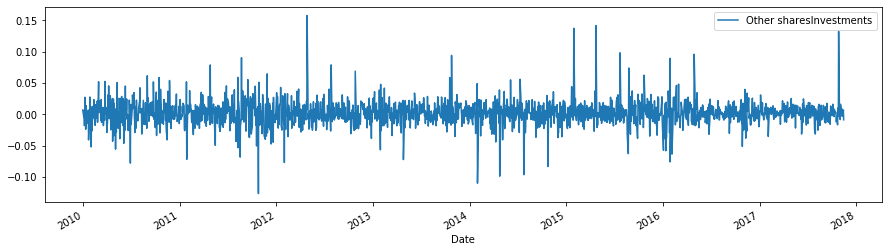

In [10]:
df.plot(figsize=(15,4))

In [11]:
def adf_test(price):
    result=adfuller(price) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [12]:
adf_test(df['Other sharesInvestments'])

ADF Test Statistic : -44.84814456404393
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


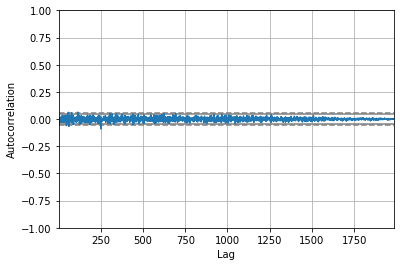

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Other sharesInvestments']) 
plt.show()

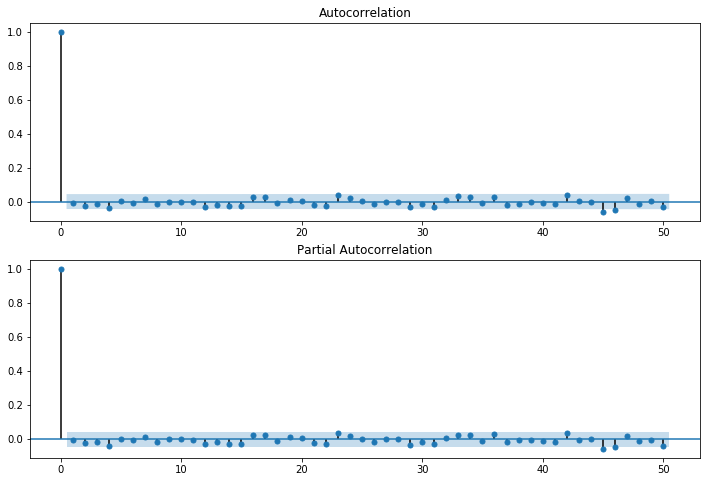

In [14]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Other sharesInvestments'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Other sharesInvestments'],lags=50,ax=ax2)

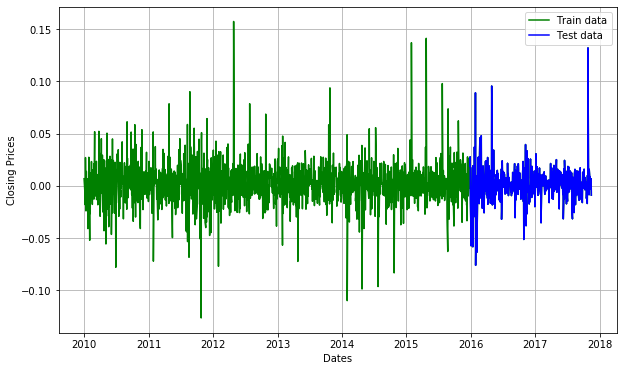

In [15]:
size=int(len(df)*0.76)
train_data, test_data = df[0:size], df[size:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [16]:
from statsmodels.tsa.arima_model import ARIMA
model1=ARIMA(train_data,order=(1,1,1)) # this order is p d q(0 or 1) 
results=model1.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Other sharesInvestments   No. Observations:                 1506
Model:                        ARIMA(1, 1, 1)   Log Likelihood                3700.755
Method:                              css-mle   S.D. of innovations              0.021
Date:                       Thu, 22 Oct 2020   AIC                          -7393.510
Time:                               23:35:34   BIC                          -7372.241
Sample:                                    1   HQIC                         -7385.588
                                                                                     
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.398e-06    3.6e-06      0.388      0.698   -5.66e-06    8.46e-06
ar.L1.D.Other sharesInvestments    -0.0168      0.026     -0.645      0.519      -0.068       0.034
ma.L1.D.Other sharesInvestments    -0.9947      0.012    -85.397      0.000      -1.018      -0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -59.6035           +0.0000j           59.6035            0.5000
MA.1            1.0053           +0.0000j            1.0053            0.0000
-----------------------------------------------------------------------------
"""

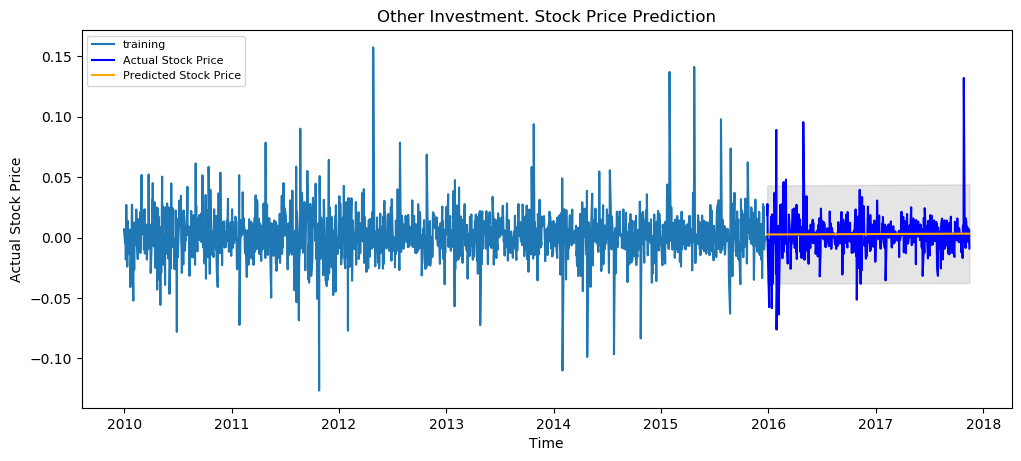

In [19]:
fc, se, conf = results.forecast(477, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Other Investment. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

MSE: 0.0002742811551019667
MAE: 0.0107550451936754
RMSE: 0.01656143578020839


In [21]:
fc_series

Date
2015-12-28    0.002681
2015-12-29    0.002615
2015-12-30    0.002617
2015-12-31    0.002619
2016-01-04    0.002620
                ...   
2017-11-09    0.003274
2017-11-10    0.003276
2017-11-13    0.003277
2017-11-14    0.003279
2017-11-15    0.003280
Length: 477, dtype: float64

In [23]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,1508)]

In [24]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [25]:
future_datest_df.tail()

,Other sharesInvestments
2021-12-27,NaN
2021-12-28,NaN
2021-12-29,NaN
2021-12-30,NaN
2021-12-31,NaN


In [26]:
fc1, se1, conf1 = results.forecast(1507, alpha=0.05)  # 95% confidence
fc1_series = pd.Series(fc1, index=future_datest_df.index)

In [27]:
fc1_series

2017-11-16    0.002681
2017-11-17    0.002615
2017-11-18    0.002617
2017-11-19    0.002619
2017-11-20    0.002620
                ...   
2021-12-27    0.004714
2021-12-28    0.004716
2021-12-29    0.004717
2021-12-30    0.004719
2021-12-31    0.004720
Length: 1507, dtype: float64

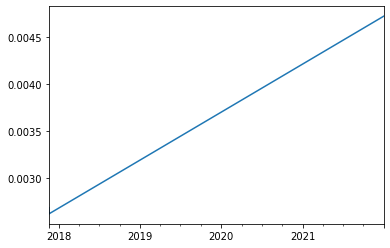

In [28]:
fc1_series.plot()

In [29]:
fc1_series.to_excel("Other_Stock_Investment_Prediction.xlsx")

From the above we can see that the value of the stocks are increasing progressively as compared to other investments, so investing on other investment stock is the better option.